In [23]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, average_precision_score

def evaluate_predictions(file_paths, plate_list=[], model_list=[], ground_truth_metadata='column_name', 
                         pc='c2', nc='c1', prediction_column='predictions', true_label='true_label', use_metadata='data_usage', generate_true_label=True, subsets=['train', 'test']):
    """
    Given a list of CSV file paths, this function reads each file, 
    calculates precision, recall, F1-score, accuracy, and PRAUC for 
    'test' and 'train' subsets, and returns a consolidated DataFrame.
    
    The CSV files must contain the columns: specified in `prediction_column` and `use_metadata`.
    """
    results = []

    for i, file_path in enumerate(file_paths):
        print(f"Processing: file nr. {i}")
        df = pd.read_csv(file_path)
        
        if 'col' in df.columns:
            df['column_name'] = df['col']
        
        if generate_true_label:
            # Ensure required columns exist
            if ground_truth_metadata not in df.columns or not {prediction_column, use_metadata}.issubset(df.columns):
                print(f"Columns in {file_path}: {df.columns.tolist()}")
                raise ValueError(f"Missing required columns in {file_path}")

            # Map ground truth labels
            df['true_label'] = df[ground_truth_metadata].map({pc: 1, nc: 0})
        
        # Drop rows where true_label is NaN
        df = df.dropna(subset=[true_label])
        df[true_label] = df[true_label].astype(int)
        
        

        for subset in subsets:
            if not subset is None: 
                subset_df = df[df[use_metadata] == subset]
            else:
                subset_df = df

            if not subset_df.empty:
                y_true = subset_df[true_label]
                y_pred = subset_df[prediction_column]

                precision = precision_score(y_true, y_pred, average='binary', zero_division=0)
                recall = recall_score(y_true, y_pred, average='binary', zero_division=0)
                f1 = f1_score(y_true, y_pred, average='binary', zero_division=0)
                accuracy = accuracy_score(y_true, y_pred)
                prauc = average_precision_score(y_true, y_pred)

                # Store results
                result_entry = {
                    'file': file_path,
                    'subset': subset,
                    'precision': precision,
                    'recall': recall,
                    'f1_score': f1,
                    'accuracy': accuracy,
                    'PRAUC': prauc
                }

                # Add optional metadata if available
                if len(plate_list) == len(file_paths):
                    result_entry['plate'] = plate_list[i]
                if len(model_list) == len(file_paths):
                    result_entry['model_name'] = model_list[i]

                results.append(result_entry)

    return pd.DataFrame(results)

file_paths = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channel_0/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channel_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channel_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channel_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_0_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_0_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_0_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_1_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_1_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_0_1_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_0_1_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/channels_1_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/morphology/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/results/xgboost_old/all_features/results.csv',
             
             
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channel_0/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channel_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channel_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channel_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_0_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_0_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_0_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_1_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_1_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_0_1_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_0_1_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/channels_1_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/morphology/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/results/xgboost_old/all_features/results.csv',
 
              
            '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channel_0/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channel_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channel_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channel_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_0_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_0_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_0_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_1_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_1_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_0_1_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_0_1_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/channels_1_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/morphology/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/results/xgboost_old/all_features/results.csv',
 
              
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channel_0/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channel_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channel_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channel_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_0_1/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_0_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_0_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_1_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_1_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_0_1_2/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_0_1_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/channels_1_2_3/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/morphology/results.csv',
             '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/results/xgboost_old/all_features/results.csv',
             ]

plate_list = ['plate1','plate1','plate1','plate1','plate1','plate1','plate1','plate1','plate1','plate1','plate1','plate1','plate1','plate1','plate1',
             'plate2','plate2','plate2','plate2','plate2','plate2','plate2','plate2','plate2','plate2','plate2','plate2','plate2','plate2','plate2',
             'plate3','plate3','plate3','plate3','plate3','plate3','plate3','plate3','plate3','plate3','plate3','plate3','plate3','plate3','plate3',
             'plate4','plate4','plate4','plate4','plate4','plate4','plate4','plate4','plate4','plate4','plate4','plate4','plate4','plate4','plate4']

model_list = ['channel_0','channel_1','channel_2','channel_3','channels_0_1','channels_0_2','channels_0_3','channels_1_2','channels_1_3','channels_2_3','channels_0_1_2','channels_0_1_2_3','channels_1_2_3','morphology','all_features',
             'channel_0','channel_1','channel_2','channel_3','channels_0_1','channels_0_2','channels_0_3','channels_1_2','channels_1_3','channels_2_3','channels_0_1_2','channels_0_1_2_3','channels_1_2_3','morphology','all_features',
             'channel_0','channel_1','channel_2','channel_3','channels_0_1','channels_0_2','channels_0_3','channels_1_2','channels_1_3','channels_2_3','channels_0_1_2','channels_0_1_2_3','channels_1_2_3','morphology','all_features',
             'channel_0','channel_1','channel_2','channel_3','channels_0_1','channels_0_2','channels_0_3','channels_1_2','channels_1_3','channels_2_3','channels_0_1_2','channels_0_1_2_3','channels_1_2_3','morphology','all_features']
df = evaluate_predictions(file_paths, plate_list, model_list)

display(df)


Processing: file nr. 0
Processing: file nr. 1
Processing: file nr. 2
Processing: file nr. 3
Processing: file nr. 4
Processing: file nr. 5
Processing: file nr. 6
Processing: file nr. 7
Processing: file nr. 8
Processing: file nr. 9
Processing: file nr. 10
Processing: file nr. 11
Processing: file nr. 12
Processing: file nr. 13
Processing: file nr. 14
Processing: file nr. 15
Processing: file nr. 16
Processing: file nr. 17
Processing: file nr. 18
Processing: file nr. 19
Processing: file nr. 20
Processing: file nr. 21
Processing: file nr. 22
Processing: file nr. 23
Processing: file nr. 24
Processing: file nr. 25
Processing: file nr. 26
Processing: file nr. 27
Processing: file nr. 28
Processing: file nr. 29
Processing: file nr. 30
Processing: file nr. 31
Processing: file nr. 32
Processing: file nr. 33
Processing: file nr. 34
Processing: file nr. 35
Processing: file nr. 36
Processing: file nr. 37
Processing: file nr. 38
Processing: file nr. 39
Processing: file nr. 40
Processing: file nr. 41
Pr

,file,subset,precision,recall,f1_score,accuracy,PRAUC,plate,model_name
0,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,train,0.716026,0.860922,0.781817,0.724747,0.696110,plate1,channel_0
1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.715823,0.861399,0.781893,0.728006,0.695055,plate1,channel_0
2,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,train,0.862600,0.941881,0.900499,0.874499,0.847509,plate1,channel_1
3,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.868053,0.946193,0.905440,0.881035,0.853735,plate1,channel_1
4,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,train,0.951532,0.945673,0.948593,0.938200,0.932594,plate1,channel_2
...,...,...,...,...,...,...,...,...,...
115,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,1.000000,1.000000,1.000000,1.000000,1.000000,plate4,channels_1_2_3
116,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,train,0.923240,0.981798,0.951619,0.939311,0.917500,plate4,morphology
117,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.648528,0.774465,0.705923,0.614964,0.636842,plate4,morphology
118,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,train,1.000000,1.000000,1.000000,1.000000,1.000000,plate4,all_features


In [26]:
import pandas as pd

file_paths = ['/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240825_094106/plate3/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241008_test_acc.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240824_072829/plate2/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241007_test_acc.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240810_132824/plate1/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241007_test_acc.csv',
              '/nas_mnt/carruthers/Einar/tsg101_screen/TSG101SCREEN_20240826_140251/plate4/datasets/training/model/maxvit_t/rgb/epochs_100/maxvit_t_time_241008_test_acc.csv']

plate_list = ['*/plate1','plate2','plate3','plate4']
model_list = ['MaxViT', 'MaxViT', 'MaxViT', 'MaxViT']

df_2 = evaluate_predictions(file_paths,
                     plate_list,
                     model_list,
                     prediction_column='predicted_label',
                     generate_true_label=False,
                     subsets=[None])

df_2['subset'] = 'test'

dfs = pd.concat([df,df_2])
display(dfs)

Processing: file nr. 0
Processing: file nr. 1
Processing: file nr. 2
Processing: file nr. 3


,file,subset,precision,recall,f1_score,accuracy,PRAUC,plate,model_name
0,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,train,0.716026,0.860922,0.781817,0.724747,0.696110,plate1,channel_0
1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.715823,0.861399,0.781893,0.728006,0.695055,plate1,channel_0
2,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,train,0.862600,0.941881,0.900499,0.874499,0.847509,plate1,channel_1
3,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.868053,0.946193,0.905440,0.881035,0.853735,plate1,channel_1
4,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,train,0.951532,0.945673,0.948593,0.938200,0.932594,plate1,channel_2
...,...,...,...,...,...,...,...,...,...
119,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,1.000000,1.000000,1.000000,1.000000,1.000000,plate4,all_features
0,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.990719,0.963883,0.977117,0.977427,0.972996,*/plate1,MaxViT
1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.989429,0.951220,0.969948,0.970528,0.965555,plate2,MaxViT
2,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.992908,0.958904,0.975610,0.976027,0.972651,plate3,MaxViT


,Unnamed: 0,file,subset,precision,recall,f1_score,accuracy,PRAUC,plate,model_name
0,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.715823,0.861399,0.781893,0.728006,0.695055,plate1,channel_0
1,3,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.868053,0.946193,0.905440,0.881035,0.853735,plate1,channel_1
2,5,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.950592,0.950592,0.950592,0.940517,0.933367,plate1,channel_2
3,7,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.866748,0.918394,0.891824,0.873900,0.842204,plate1,channel_3
4,9,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.864078,0.922280,0.892231,0.873900,0.840910,plate1,channels_0_1
...,...,...,...,...,...,...,...,...,...,...
59,119,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,1.000000,1.000000,1.000000,1.000000,1.000000,plate4,all_features
60,0,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.990719,0.963883,0.977117,0.977427,0.972996,*/plate1,MaxViT
61,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.989429,0.951220,0.969948,0.970528,0.965555,plate2,MaxViT
62,2,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.992908,0.958904,0.975610,0.976027,0.972651,plate3,MaxViT


performing_dunns
Plot saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp_precision/model_test_comp_precision_precision_model_name_jitter_bar.pdf
Test results saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp_precision/model_test_comp_precision_precision_model_name_jitter_bar.csv


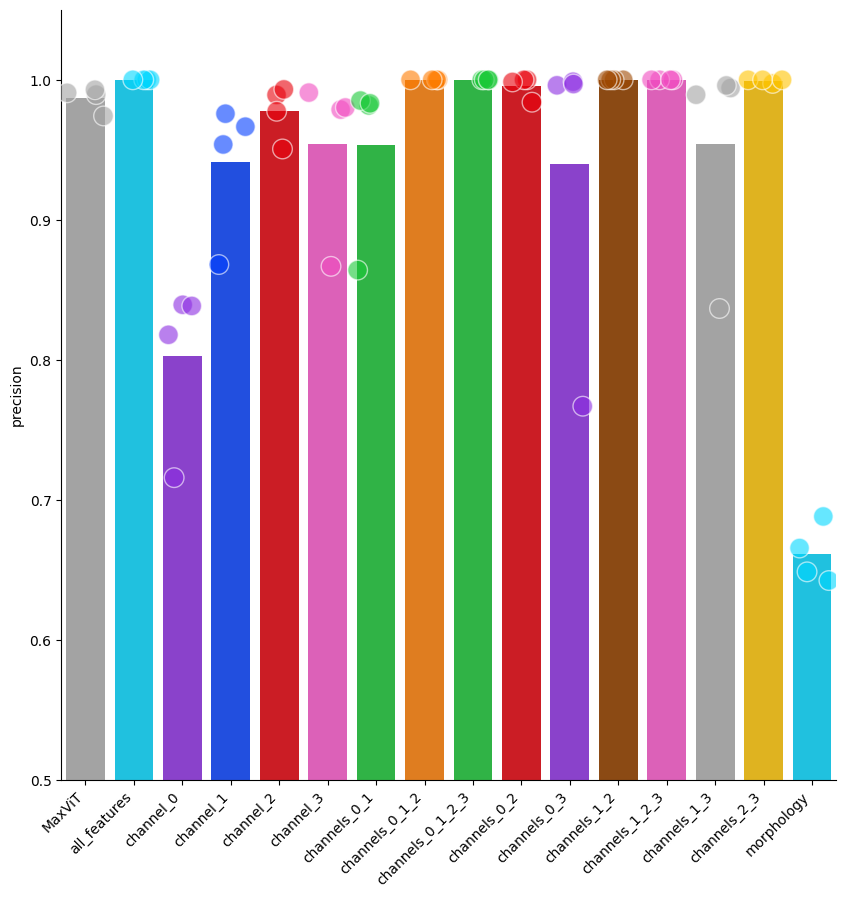

,Comparison,Test Statistic,p-value,Test Name,Column,n,n_object,n_well,p_adjust_method
0,Normality test for MaxViT on precision,0.782428,0.074261,Shapiro-Wilk test,precision,4.0,NaN,NaN,NaN
1,Normality test for all_features on precision,1.000000,1.000000,Shapiro-Wilk test,precision,4.0,NaN,NaN,NaN
2,Normality test for channel_0 on precision,0.749781,0.038445,Shapiro-Wilk test,precision,4.0,NaN,NaN,NaN
3,Normality test for channel_1 on precision,0.789482,0.084658,Shapiro-Wilk test,precision,4.0,NaN,NaN,NaN
4,Normality test for channel_2 on precision,0.879654,0.337161,Shapiro-Wilk test,precision,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
132,channels_1_2_3 vs channels_2_3,NaN,0.904600,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
133,channels_1_2_3 vs morphology,NaN,0.002539,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
134,channels_1_3 vs channels_2_3,NaN,0.154711,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
135,channels_1_3 vs morphology,NaN,0.150817,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

data = ['/media/carruthers/einar/figures_methods/Figures/figure_2/c/data_test.csv']

settings = {'src':data,
            'graph_name':'model_test_comp_precision',
            'data_column':['precision'],
            'grouping_column':'model_name',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[0.5,None],
            'log_y':False,
            'log_x':False,
            'representation':'plate',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

,Unnamed: 0,file,subset,precision,recall,f1_score,accuracy,PRAUC,plate,model_name
0,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.715823,0.861399,0.781893,0.728006,0.695055,plate1,channel_0
1,3,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.868053,0.946193,0.905440,0.881035,0.853735,plate1,channel_1
2,5,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.950592,0.950592,0.950592,0.940517,0.933367,plate1,channel_2
3,7,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.866748,0.918394,0.891824,0.873900,0.842204,plate1,channel_3
4,9,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.864078,0.922280,0.892231,0.873900,0.840910,plate1,channels_0_1
...,...,...,...,...,...,...,...,...,...,...
59,119,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,1.000000,1.000000,1.000000,1.000000,1.000000,plate4,all_features
60,0,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.990719,0.963883,0.977117,0.977427,0.972996,*/plate1,MaxViT
61,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.989429,0.951220,0.969948,0.970528,0.965555,plate2,MaxViT
62,2,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.992908,0.958904,0.975610,0.976027,0.972651,plate3,MaxViT


performing_dunns
Plot saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp_recall/model_test_comp_recall_recall_model_name_jitter_bar.pdf
Test results saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp_recall/model_test_comp_recall_recall_model_name_jitter_bar.csv


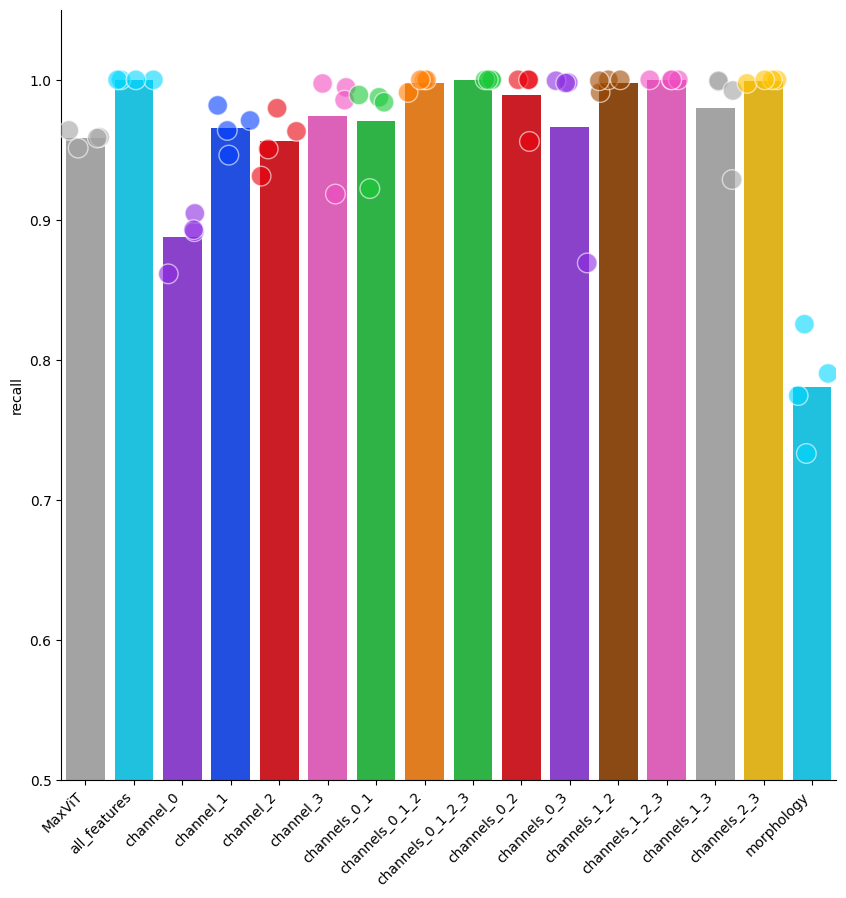

,Comparison,Test Statistic,p-value,Test Name,Column,n,n_object,n_well,p_adjust_method
0,Normality test for MaxViT on recall,0.945863,0.690377,Shapiro-Wilk test,recall,4.0,NaN,NaN,NaN
1,Normality test for all_features on recall,1.000000,1.000000,Shapiro-Wilk test,recall,4.0,NaN,NaN,NaN
2,Normality test for channel_0 on recall,0.878631,0.332821,Shapiro-Wilk test,recall,4.0,NaN,NaN,NaN
3,Normality test for channel_1 on recall,0.980814,0.906779,Shapiro-Wilk test,recall,4.0,NaN,NaN,NaN
4,Normality test for channel_2 on recall,0.998081,0.993945,Shapiro-Wilk test,recall,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
132,channels_1_2_3 vs channels_2_3,NaN,0.830079,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
133,channels_1_2_3 vs morphology,NaN,0.003425,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
134,channels_1_3 vs channels_2_3,NaN,0.298121,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
135,channels_1_3 vs morphology,NaN,0.113848,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh


In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

data = ['/media/carruthers/einar/figures_methods/Figures/figure_2/c/data_test.csv']

settings = {'src':data,
            'graph_name':'model_test_comp_recall',
            'data_column':['recall'],
            'grouping_column':'model_name',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[0.5,None],
            'log_y':False,
            'log_x':False,
            'representation':'plate',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

,Unnamed: 0,file,subset,precision,recall,f1_score,accuracy,PRAUC,plate,model_name
0,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.715823,0.861399,0.781893,0.728006,0.695055,plate1,channel_0
1,3,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.868053,0.946193,0.905440,0.881035,0.853735,plate1,channel_1
2,5,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.950592,0.950592,0.950592,0.940517,0.933367,plate1,channel_2
3,7,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.866748,0.918394,0.891824,0.873900,0.842204,plate1,channel_3
4,9,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.864078,0.922280,0.892231,0.873900,0.840910,plate1,channels_0_1
...,...,...,...,...,...,...,...,...,...,...
59,119,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,1.000000,1.000000,1.000000,1.000000,1.000000,plate4,all_features
60,0,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.990719,0.963883,0.977117,0.977427,0.972996,*/plate1,MaxViT
61,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.989429,0.951220,0.969948,0.970528,0.965555,plate2,MaxViT
62,2,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.992908,0.958904,0.975610,0.976027,0.972651,plate3,MaxViT


performing_dunns
Plot saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp_f1_score/model_test_comp_f1_score_f1_score_model_name_jitter_bar.pdf
Test results saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp_f1_score/model_test_comp_f1_score_f1_score_model_name_jitter_bar.csv


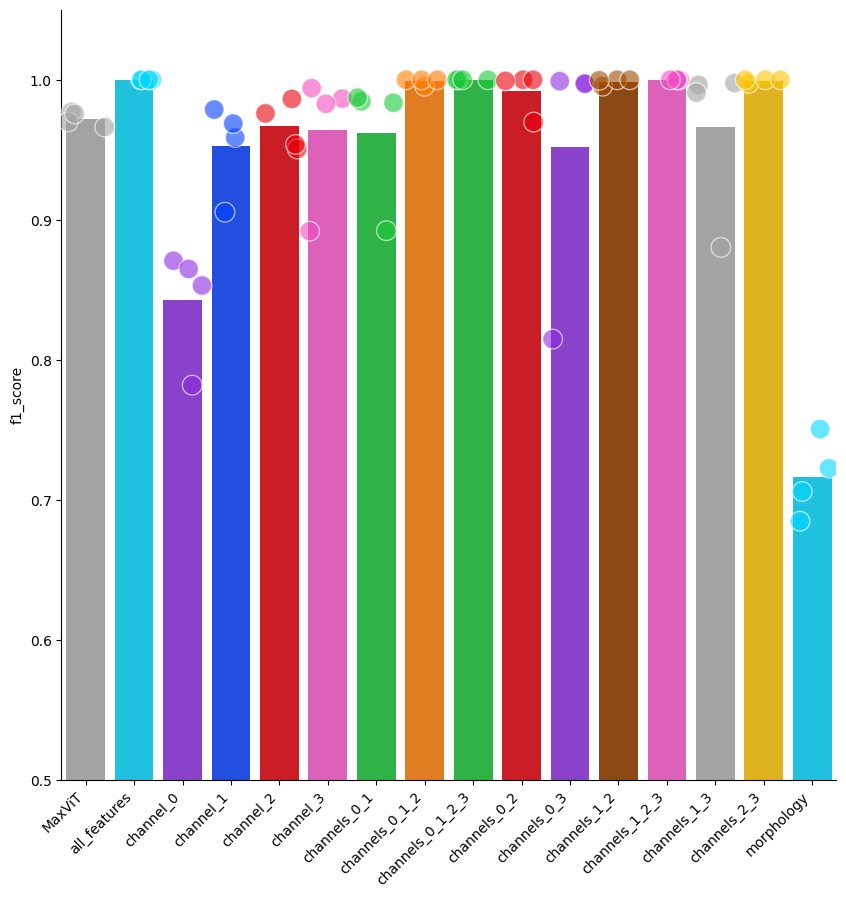

,Comparison,Test Statistic,p-value,Test Name,Column,n,n_object,n_well,p_adjust_method
0,Normality test for MaxViT on f1_score,0.927409,0.579256,Shapiro-Wilk test,f1_score,4.0,NaN,NaN,NaN
1,Normality test for all_features on f1_score,1.000000,1.000000,Shapiro-Wilk test,f1_score,4.0,NaN,NaN,NaN
2,Normality test for channel_0 on f1_score,0.781161,0.072505,Shapiro-Wilk test,f1_score,4.0,NaN,NaN,NaN
3,Normality test for channel_1 on f1_score,0.844598,0.209143,Shapiro-Wilk test,f1_score,4.0,NaN,NaN,NaN
4,Normality test for channel_2 on f1_score,0.889303,0.379889,Shapiro-Wilk test,f1_score,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
132,channels_1_2_3 vs channels_2_3,NaN,0.840888,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
133,channels_1_2_3 vs morphology,NaN,0.003064,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
134,channels_1_3 vs channels_2_3,NaN,0.211005,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
135,channels_1_3 vs morphology,NaN,0.131987,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

data = ['/media/carruthers/einar/figures_methods/Figures/figure_2/c/data_test.csv']

settings = {'src':data,
            'graph_name':'model_test_comp_f1_score',
            'data_column':['f1_score'],
            'grouping_column':'model_name',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[0.5,None],
            'log_y':False,
            'log_x':False,
            'representation':'plate',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

,Unnamed: 0,file,subset,precision,recall,f1_score,accuracy,PRAUC,plate,model_name
0,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.715823,0.861399,0.781893,0.728006,0.695055,plate1,channel_0
1,3,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.868053,0.946193,0.905440,0.881035,0.853735,plate1,channel_1
2,5,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.950592,0.950592,0.950592,0.940517,0.933367,plate1,channel_2
3,7,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.866748,0.918394,0.891824,0.873900,0.842204,plate1,channel_3
4,9,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.864078,0.922280,0.892231,0.873900,0.840910,plate1,channels_0_1
...,...,...,...,...,...,...,...,...,...,...
59,119,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,1.000000,1.000000,1.000000,1.000000,1.000000,plate4,all_features
60,0,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.990719,0.963883,0.977117,0.977427,0.972996,*/plate1,MaxViT
61,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.989429,0.951220,0.969948,0.970528,0.965555,plate2,MaxViT
62,2,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.992908,0.958904,0.975610,0.976027,0.972651,plate3,MaxViT


performing_dunns
Plot saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp_PRAUC/model_test_comp_PRAUC_PRAUC_model_name_jitter_bar.pdf
Test results saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp_PRAUC/model_test_comp_PRAUC_PRAUC_model_name_jitter_bar.csv


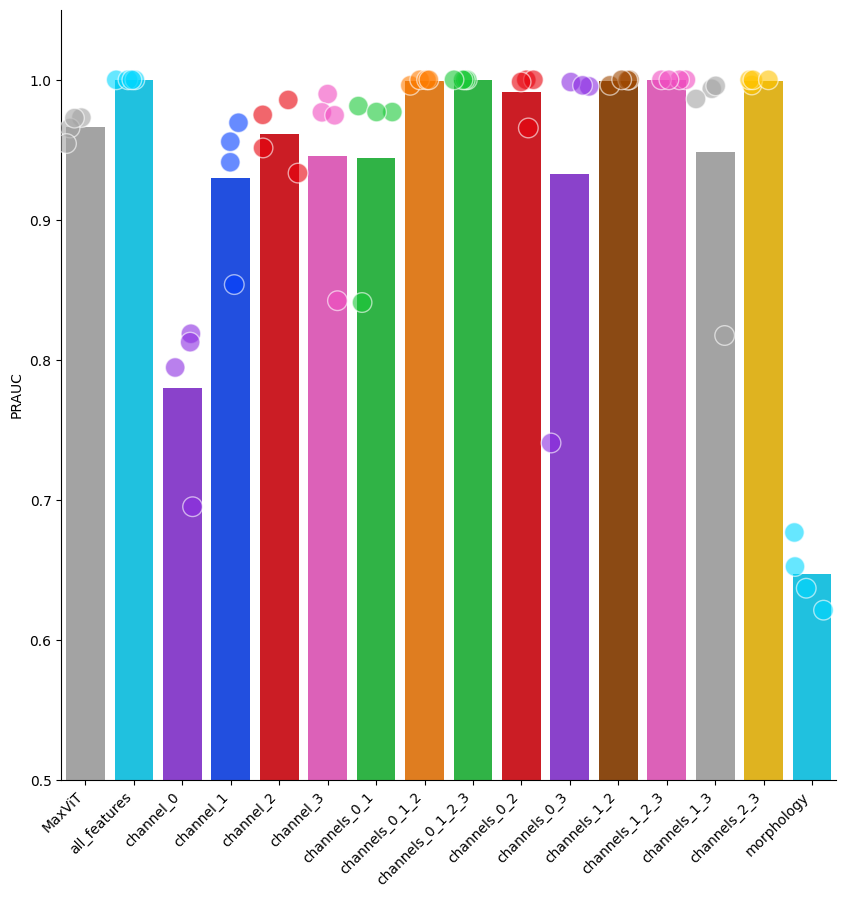

,Comparison,Test Statistic,p-value,Test Name,Column,n,n_object,n_well,p_adjust_method
0,Normality test for MaxViT on PRAUC,0.857871,0.252684,Shapiro-Wilk test,PRAUC,4.0,NaN,NaN,NaN
1,Normality test for all_features on PRAUC,1.000000,1.000000,Shapiro-Wilk test,PRAUC,4.0,NaN,NaN,NaN
2,Normality test for channel_0 on PRAUC,0.774753,0.064115,Shapiro-Wilk test,PRAUC,4.0,NaN,NaN,NaN
3,Normality test for channel_1 on PRAUC,0.822663,0.149463,Shapiro-Wilk test,PRAUC,4.0,NaN,NaN,NaN
4,Normality test for channel_2 on PRAUC,0.957540,0.763430,Shapiro-Wilk test,PRAUC,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
132,channels_1_2_3 vs channels_2_3,NaN,0.873846,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
133,channels_1_2_3 vs morphology,NaN,0.003064,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
134,channels_1_3 vs channels_2_3,NaN,0.169090,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
135,channels_1_3 vs morphology,NaN,0.135185,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

data = ['/media/carruthers/einar/figures_methods/Figures/figure_2/c/data_test.csv']

settings = {'src':data,
            'graph_name':'model_test_comp_PRAUC',
            'data_column':['PRAUC'],
            'grouping_column':'model_name',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[0.5,None],
            'log_y':False,
            'log_x':False,
            'representation':'plate',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)

In [28]:
data_csv_path = '/media/carruthers/einar/figures_methods/Figures/figure_2/c/data.csv'
dfs.to_csv(data_csv_path, index=True, header=True)

,Unnamed: 0,file,subset,precision,recall,f1_score,accuracy,PRAUC,plate,model_name
0,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.715823,0.861399,0.781893,0.728006,0.695055,plate1,channel_0
1,3,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.868053,0.946193,0.905440,0.881035,0.853735,plate1,channel_1
2,5,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.950592,0.950592,0.950592,0.940517,0.933367,plate1,channel_2
3,7,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.866748,0.918394,0.891824,0.873900,0.842204,plate1,channel_3
4,9,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.864078,0.922280,0.892231,0.873900,0.840910,plate1,channels_0_1
...,...,...,...,...,...,...,...,...,...,...
59,119,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,1.000000,1.000000,1.000000,1.000000,1.000000,plate4,all_features
60,0,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.990719,0.963883,0.977117,0.977427,0.972996,*/plate1,MaxViT
61,1,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.989429,0.951220,0.969948,0.970528,0.965555,plate2,MaxViT
62,2,/nas_mnt/carruthers/Einar/tsg101_screen/TSG101...,test,0.992908,0.958904,0.975610,0.976027,0.972651,plate3,MaxViT


performing_dunns
Plot saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp/model_test_comp_accuracy_model_name_jitter_bar.pdf
Test results saved to /media/carruthers/einar/figures_methods/Figures/figure_2/c/results/model_test_comp/model_test_comp_accuracy_model_name_jitter_bar.csv


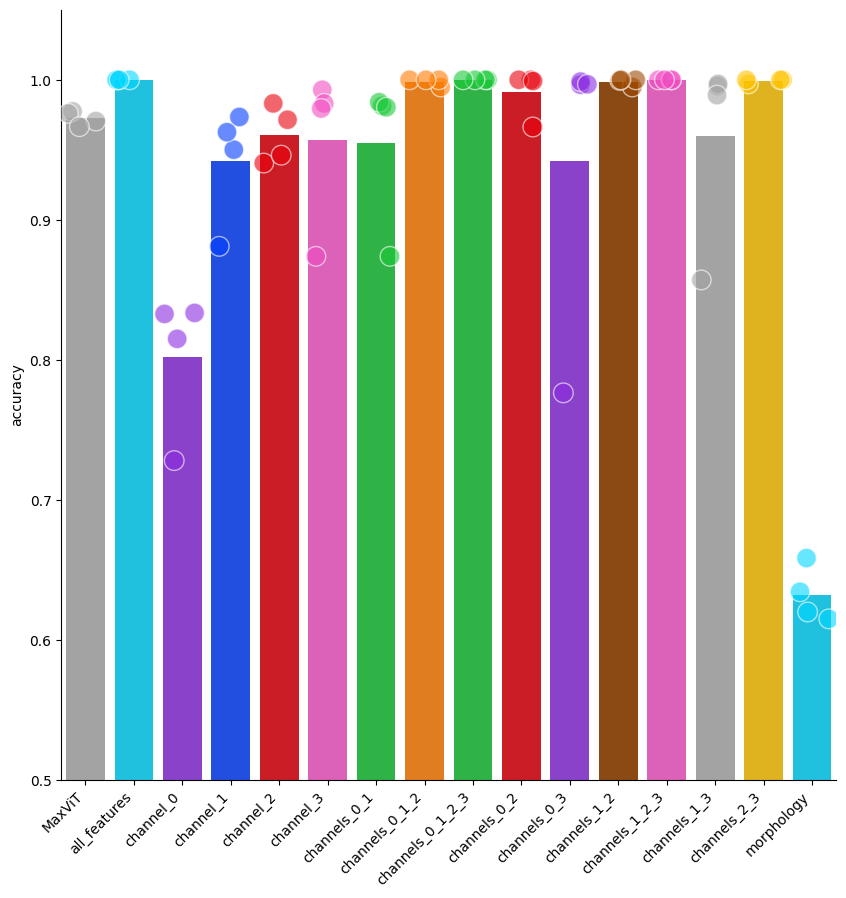

,Comparison,Test Statistic,p-value,Test Name,Column,n,n_object,n_well,p_adjust_method
0,Normality test for MaxViT on accuracy,0.927106,0.577496,Shapiro-Wilk test,accuracy,4.0,NaN,NaN,NaN
1,Normality test for all_features on accuracy,1.000000,1.000000,Shapiro-Wilk test,accuracy,4.0,NaN,NaN,NaN
2,Normality test for channel_0 on accuracy,0.750928,0.039405,Shapiro-Wilk test,accuracy,4.0,NaN,NaN,NaN
3,Normality test for channel_1 on accuracy,0.828334,0.163501,Shapiro-Wilk test,accuracy,4.0,NaN,NaN,NaN
4,Normality test for channel_2 on accuracy,0.906970,0.466499,Shapiro-Wilk test,accuracy,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
132,channels_1_2_3 vs channels_2_3,NaN,0.857206,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
133,channels_1_2_3 vs morphology,NaN,0.003063,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
134,channels_1_3 vs channels_2_3,NaN,0.205067,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh
135,channels_1_3 vs morphology,NaN,0.131334,Dunn's Post-hoc,NaN,NaN,8.0,68.0,fdr_bh


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
from spacr.plot import plot_data_from_csv
import os

data = ['/media/carruthers/einar/figures_methods/Figures/figure_2/c/data_test.csv']

settings = {'src':data,
            'graph_name':'model_test_comp',
            'data_column':['accuracy'],
            'grouping_column':'model_name',
            'graph_type':'jitter_bar',
            'theme':'bright',
            'save':True,
            'y_lim':[0.5,None],
            'log_y':False,
            'log_x':False,
            'representation':'plate',
            'verbose':True}

fig,df = plot_data_from_csv(settings)
plt.show()
display(df)